# Statistical Learning Week 7 - Deep Neural Networks

### Jonathan Gragg: East Section

In [73]:
#loading in relevant packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# TensorFlow / Keras functions
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## 1. Load the Ames Housing dataset. Create dummy variables for all of the categorical features. Print the first few rows of this dataset. (5 pts)

In [74]:
ames = pd.read_csv('ames.csv')
df = pd.get_dummies(ames, drop_first=True)
df.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


## 2. Use "Sale_Price" to create a column vector of responses (y). Create a feature matrix (X) using all of the other variables. (5 pts)

In [75]:
y = df['Sale_Price'].values
X = df.drop('Sale_Price',axis=1).values

## 3. Split the data into training, validation, and testing sets using a 60/20/20 split. Print the dimensions of each of the feature matrices. (5 pts)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=2019)
print("X_train","X_valid","X_test","y_train","y_valid","y_test")
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

X_train X_valid X_test y_train y_valid y_test
(1758, 306) (586, 306) (586, 306) (1758,) (586,) (586,)


## 4. Standardize both the features and responses from the training set. Apply the appropriate transformation to the validation and test sets. (10 pts)

In [77]:
scaler = StandardScaler()

#training data set
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(y_train.reshape(-1,1))
y_train = scaler.transform(y_train.reshape(-1,1))

#validation data set
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)
scaler.fit(y_valid.reshape(-1,1))
y_valid = scaler.transform(y_valid.reshape(-1,1))

#testing data set
scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler.fit(y_test.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

## 5. Before we fit a neural network, we'll first try a simpler model using the Lasso. Fit a Lasso regression model to the training set using alpha=.05 as the tuning parameter. This should be a good choice assuming the data has been standardized. Calculate the mean squared error (MSE) on the training, validation, and test sets. (10 pts)

In [78]:
ls = Lasso(alpha=0.5)
ls.fit(X_train,y_train)
preds_tr = ls.predict(X_train)
print("Training MSE:",mean_squared_error(y_train,preds_tr))
preds_v = ls.predict(X_valid)
print("Validation MSE:",mean_squared_error(y_valid,preds_v))
preds_te = ls.predict(X_test)
print("Testing MSE:",mean_squared_error(y_test,preds_te))

Training MSE: 0.7181094358737364
Validation MSE: 0.7174834930146333
Testing MSE: 0.694076354802436


## 6. Fit a neural network using the following architecture, and print the output from training. (15 pts)
* Use 2 hidden layers with 50 neurons each;
* Use ReLU activation functions for the hidden layers;
* Use a linear activation function for the output layer;
* Use MSE for the loss function;
* Use the Adam optimizer;
* Use 100 epochs;
* Use a batch size of 100.

In [79]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError())

history = model.fit(X_train, y_train, epochs=100, batch_size=100, 
                    validation_data=(X_valid, y_valid),verbose=0)

model.predict(X_train)

array([[-0.7966611 ],
       [-0.6121895 ],
       [ 0.03458093],
       ...,
       [ 1.6824687 ],
       [-0.6412039 ],
       [-1.1029694 ]], dtype=float32)

## 7. Print the MSE from the test set using the model in (6). How does this compare to the Lasso? (5 pts)

In [80]:
pred_te = model.predict(X_test)
print("Test MSE:",mean_squared_error(y_test,pred_te))

Test MSE: 0.12926920123250632


the MSE for the neural network was significantly lower than the MSE using the Lasso regression

## 8. Optimize the neural network you fit in Q6 to get a better MSE than the Lasso model. You should use the validation set to ensure you're not overfitting. Print the output from training this model. Consider changing the following components to improve performance (it's not required to change all of these). (20 pts)
* Number of layers;
* Number of neurons per layer;
* Number of epochs and batch size;
* Activation functions of hidden layers;
* Adding regularization (Dropout layers, L1/L2 penalties, early stopping).

In [87]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1], ),kernel_regularizer=keras.regularizers.l2(.001)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError())

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=100, 
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=0)

model.predict(X_train)

array([[-0.8135778 ],
       [-0.5656206 ],
       [ 0.06807338],
       ...,
       [ 1.6967919 ],
       [-0.6295544 ],
       [-1.1139355 ]], dtype=float32)

## 9. Print the MSE from the test set using the model in Q8. (5 pts) 

In [88]:
pred_te = model.predict(X_test)
print("Test MSE:",mean_squared_error(y_test,pred_te))

Test MSE: 0.09807123972995355


## 10. Plot the training and validation MSE for each epoch. (10 pts)

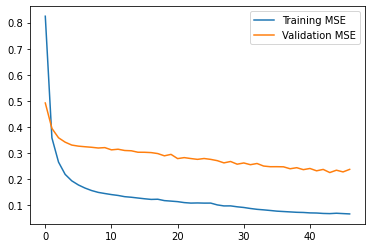

In [89]:
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.legend()

## 11. In a few sentences, describe how you optimized the model in Q8. Did you find that changing certain components had bigger effects on the error rate? (5 pts)
I added L2 regularization and doubled the number of neurons in the first hidden layer. That by itself decreased the MSE in half. But I was nervous I was overfitting the model so applied early stopping to the model and after than I ended with a slightly higher MSE but still lower than the first neural net.

## 12. How do you know that your model is not overfitting? That is, how do you know you didn't get lucky on the test set? (5 pts)

When I'm looking at the graph from Q10, I'm seeing the validation MSE steadily decreasing. If I was overfitting to the training data set I would have expected to see leveling off of the validation MSE while the training MSE continued to decrease. I also applied early stopping to make the likelihood of overfitting to training extremely low.